In [14]:
import numpy as np
import librosa
import librosa.display
import sklearn
import os
import matplotlib
import matplotlib.pyplot as plt

In [5]:
audio,sr = librosa.load(r'D:\tiniminipro\MGC\genres\classical\classical.00055.wav')

In [6]:
audio_harmonic , audio_percussive = librosa.effects.hpss(audio)
tempo ,beat_frames = librosa.beat.beat_track(y=audio,sr=sr) 

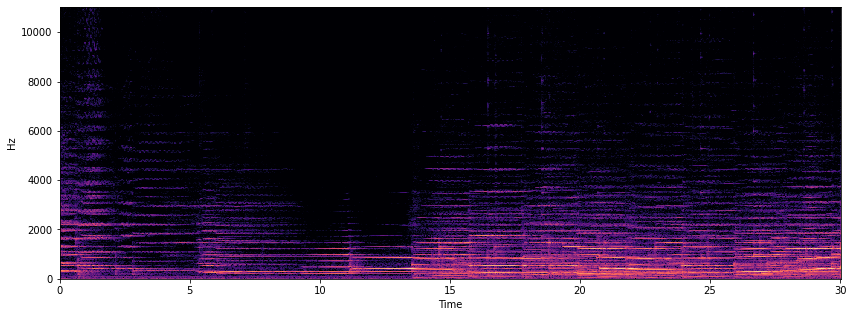

In [9]:
rap_ft = librosa.stft(audio)
rap_FT = librosa.amplitude_to_db(abs(rap_ft))

plt.figure(figsize=(14, 5))
librosa.display.specshow(rap_FT, sr=sr, x_axis='time', y_axis='hz')

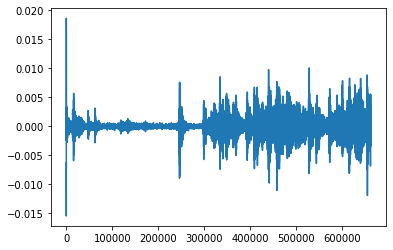

In [10]:
plt.plot(audio_percussive)

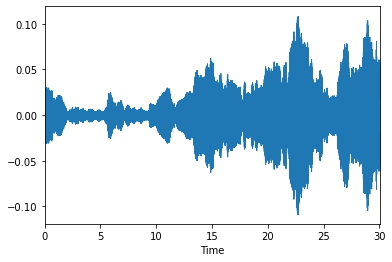

In [11]:
librosa.display.waveplot(audio)

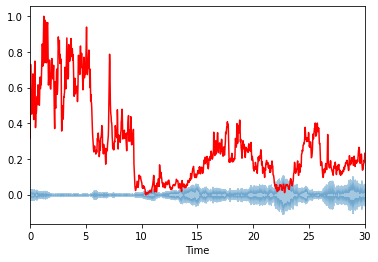

In [15]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound

spectral_centroids = librosa.feature.spectral_centroid(audio, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(audio, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')